<a href="https://colab.research.google.com/github/hammadfaheem/Deep-Learnig-Assignment/blob/main/malaria_cell_images_classifiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download iarunava/cell-images-for-detecting-malaria


mkdir: cannot create directory ‘/root/.kaggle’: File exists
 98% 663M/675M [00:03<00:00, 192MB/s]
100% 675M/675M [00:03<00:00, 179MB/s]


In [11]:
#import shutil
#shutil.rmtree("./Cell_images")
os.makedirs("./Cell_images")

In [12]:
Image_size= 256
Batch_size= 64
Channel = 3
data_dir = "/content/cell_images/cell_images"

In [16]:
!unzip "/content/cell-images-for-detecting-malaria.zip" -d "/content/" 

Streaming output truncated to the last 5000 lines.
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: /content/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: /content/cell_imag

In [17]:
!pip install split_folders -q
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(data_dir, output="./Cell_images",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 27560 files [00:06, 4558.91 files/s]


In [ ]:
#os.listdir(data_dir)

In [ ]:
#data = image_dataset_from_directory(
#  data_dir,
#  image_size=(Image_size,Image_size),
#  batch_size=Batch_size,
#  #color_mode= "grayscale"
#)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.3
)
train_generator = train_datagen.flow_from_directory(
        './Cell_images/train',
        target_size=(Image_size,Image_size),
        batch_size=Batch_size,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 22046 images belonging to 2 classes.


In [19]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
)
test_generator = test_datagen.flow_from_directory(
        './Cell_images/test',
        target_size=(Image_size,Image_size),
        batch_size=Batch_size,
        class_mode="sparse",
)


Found 2756 images belonging to 2 classes.


In [20]:
val_datagen = ImageDataGenerator(
        rescale=1./255,
)
val_generator = val_datagen.flow_from_directory(
        './Cell_images/val',
        target_size=(Image_size,Image_size),
        batch_size=Batch_size,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2756 images belonging to 2 classes.


In [21]:
#class_names = data.class_names
#class_names

In [22]:
class_names = list(train_generator.class_indices.keys())
class_names

['Parasitized', 'Uninfected']

In [23]:
#plt.figure(figsize=(15,15))
#plt.axis=('off')
#for image_batch,image_label in data.take(1):
#    for i in range(12):
#        ax=plt.subplot(3,4,i+1)
#        plt.imshow(image_batch[i].numpy().astype('uint8'))
#        ax.axis("off")
#        plt.title(class_names[image_label[i]])

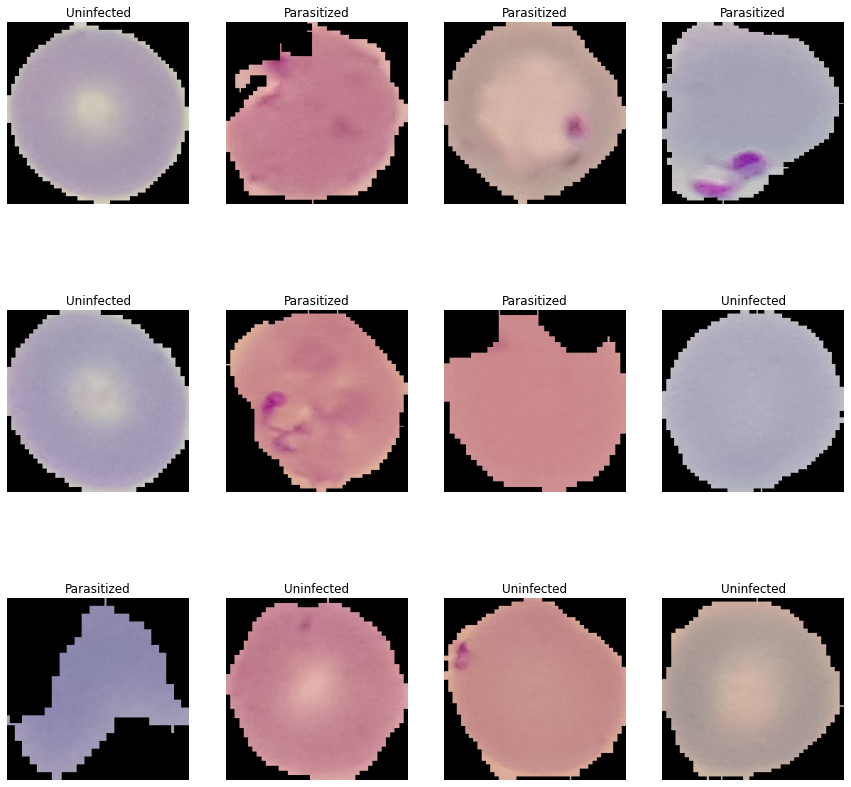

In [24]:
plt.figure(figsize=(15,15))
image_batch, image_label = next(train_generator)
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i])
    ax.axis("off")
    plt.title(class_names[int(image_label[i])])

In [ ]:
#def train_test_val_split(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=1000):
#    ds_size= len(ds)
#    if shuffle:
#        ds= ds.shuffle(shuffle_size, seed=12)
#    train_size= int(ds_size*train_split)
#    test_size = int(ds_size*test_split)
#    
#    train_ds = ds.take(train_size)
#    val_ds = ds.skip(train_size).take(test_size)
#    test_ds = ds.skip(train_size).skip(test_size)
#    
#    
#    return train_ds,test_ds,val_ds

In [ ]:
#train_ds,test_ds,val_ds = train_test_val_split(data,train_split=0.5,test_split=0.15,val_split=0.15)
#print(len(train_ds))
#print(len(test_ds))
#print(len(val_ds))

In [ ]:
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
input_shape= (Image_size,Image_size,Channel)

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])
resize_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [28]:
num_classes= len(class_names)
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

In [31]:
epochs=10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    batch_size = Batch_size,
    epochs = epochs,
    #verbose = 1
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


345/345 [==============================] - 97s 247ms/step - loss: 0.3354 - accuracy: 0.8222 - val_loss: 0.1423 - val_accuracy: 0.9539
Epoch 2/10
345/345 [==============================] - 82s 238ms/step - loss: 0.1374 - accuracy: 0.9557 - val_loss: 0.1371 - val_accuracy: 0.9521
Epoch 3/10
345/345 [==============================] - 82s 238ms/step - loss: 0.1291 - accuracy: 0.9575 - val_loss: 0.1333 - val_accuracy: 0.9575
Epoch 4/10
345/345 [==============================] - 82s 237ms/step - loss: 0.1220 - accuracy: 0.9599 - val_loss: 0.1190 - val_accuracy: 0.9597
Epoch 5/10
345/345 [==============================] - 82s 237ms/step - loss: 0.1164 - accuracy: 0.9603 - val_loss: 0.1348 - val_accuracy: 0.9554
Epoch 6/10
345/345 [==============================] - 82s 237ms/step - loss: 0.1095 - accuracy: 0.9623 - val_loss: 0.1145 - val_accuracy: 0.9601
Epoch 7/10
345/345 [==============================] - 82s 237ms/step - loss: 0.1024 - accuracy: 0.9647 - val_loss: 0.1168 - val_accuracy: 0.9

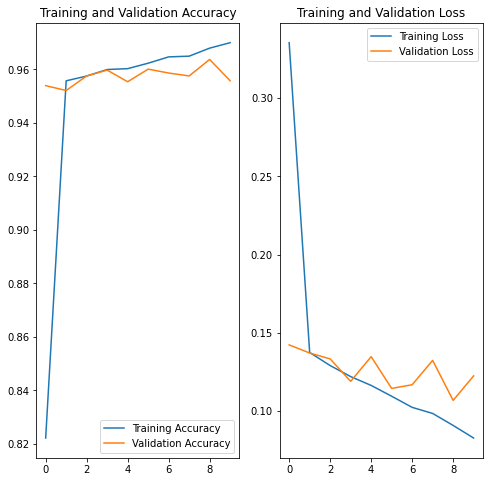

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
model.evaluate(test_generator)

44/44 [==============================] - 6s 143ms/step - loss: 0.1319 - accuracy: 0.9626


[0.1319304257631302, 0.9626269936561584]

In [34]:
def predict(model, img):
    image_array = tf.keras.preprocessing.image.img_to_array(img)
    image_array = tf.expand_dims(image_array, 0)
    
    prediction = model.predict(image_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = round(100* (np.max(prediction)),2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        ax.axis("off")

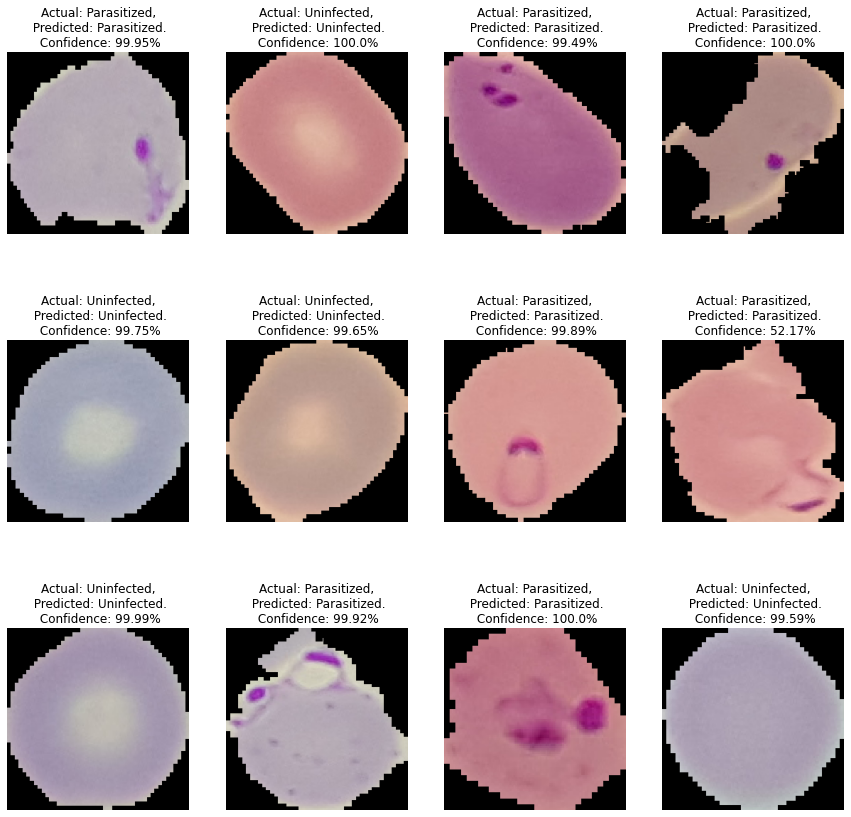

In [35]:
plt.figure(figsize=(15,15))
image_batch, image_label = next(test_generator)
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i])
    ax.axis("off")
    #plt.title(class_names[int(image_label[i])])
    predicted_class, confidence = predict(model, image_batch[i])
    actual_class = class_names[int(image_label[i])]
    
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")